# NLP Demo Logistic Regression

In [1]:
import pandas as pd

In [2]:
filepath_dict = {
    'yelp': 'data/yelp_labelled.txt',
    'amazon': 'data/amazon_cells_labelled.txt',
    'imdb': 'data/imdb_labelled.txt'
}

df_list = []

for source, filepath in filepath_dict.items():
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
  df['source'] = source
  df_list.append(df)

df = pd.concat(df_list)

df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


## Neural Network

In [3]:
df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
labels = df_yelp['label'].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=1000)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer()

In [8]:
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [9]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                17150     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 17,161
Trainable params: 17,161
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_data=(X_test, y_test)
)

Epoch 1/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5227 - val_loss: 0.6896 - val_accuracy: 0.5760
Epoch 2/100
24/24 [==============================] - 0s 891us/step - loss: 0.6608 - accuracy: 0.7453 - val_loss: 0.6758 - val_accuracy: 0.6360
Epoch 3/100
24/24 [==============================] - 0s 948us/step - loss: 0.6224 - accuracy: 0.8427 - val_loss: 0.6545 - val_accuracy: 0.7120
Epoch 4/100
24/24 [==============================] - 0s 930us/step - loss: 0.5720 - accuracy: 0.8853 - val_loss: 0.6276 - val_accuracy: 0.7320
Epoch 5/100
24/24 [==============================] - 0s 930us/step - loss: 0.5142 - accuracy: 0.9147 - val_loss: 0.5974 - val_accuracy: 0.7640
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.9307 - val_loss: 0.5705 - val_accuracy: 0.7760
Epoch 7/100
24/24 [==============================] - 0s 914us/step - loss: 0.4038 - accuracy: 0.9440 - val_loss: 0.5464 - val_accuracy: 0.7800
Epo

24/24 [==============================] - 0s 859us/step - loss: 0.0151 - accuracy: 0.9987 - val_loss: 0.4346 - val_accuracy: 0.8040
Epoch 59/100
24/24 [==============================] - 0s 890us/step - loss: 0.0145 - accuracy: 0.9987 - val_loss: 0.4358 - val_accuracy: 0.8040
Epoch 60/100
24/24 [==============================] - 0s 849us/step - loss: 0.0140 - accuracy: 0.9987 - val_loss: 0.4381 - val_accuracy: 0.8040
Epoch 61/100
24/24 [==============================] - 0s 835us/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.4386 - val_accuracy: 0.8040
Epoch 62/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.4400 - val_accuracy: 0.8040
Epoch 63/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.4415 - val_accuracy: 0.8040
Epoch 64/100
24/24 [==============================] - 0s 919us/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.8040
Epoch 65/

In [14]:
_, train_accuracy = model.evaluate(X_train, y_train)
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Testing accuracy: {test_accuracy:.4f}')

8/8 [==============================] - 0s 610us/step - loss: 0.5024 - accuracy: 0.8000
Training accuracy: 1.0000
Testing accuracy: 0.8000


In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.style.use('ggplot')

In [17]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

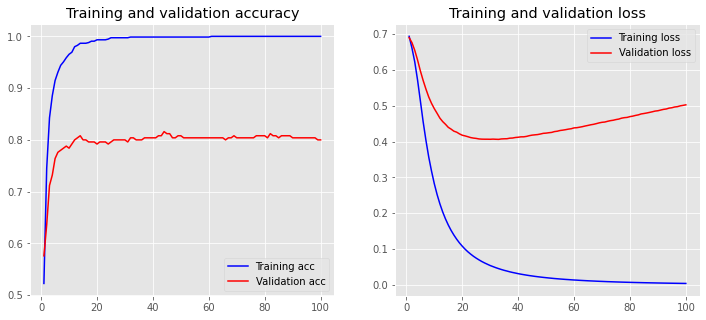

In [18]:
plot_history(history)